# MOVIE RECOMMENDER SYSTEM - 3 -> DETAILED


In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
movies = pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/drive/MyDrive/tmdb_5000_credits.csv')

In [4]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


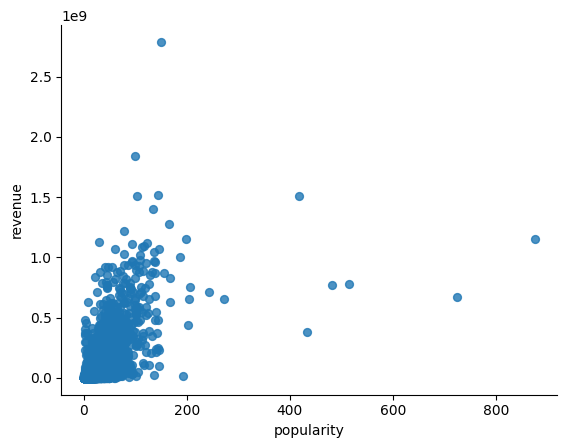

In [5]:
# @title popularity vs revenue

from matplotlib import pyplot as plt
movies.plot(kind='scatter', x='popularity', y='revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
movies.shape

(4803, 20)

In [7]:
credits.head(10)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


In [8]:
movies = movies.merge(credits,on='title')
# merging two csv files based on movie title

In [9]:
movies.head()
# budget , genres , homepage , id , keywords , original_language , original_title , overview ,
# popularity , production_companies , runtime , spoken_languages ,status , tagline,
# title , vote_average , vote_count , movie_id , cast , crew

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
# sorting out some column names

In [11]:
#movies.head()
movies

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [12]:
import ast
# The ast (Abstract Syntax Trees) module is imported.
# This module helps in parsing and processing Python syntax structures

In [13]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

    # The literal_eval function from this module safely evaluates a string
    # containing a Python literal or container display.

In [14]:
movies.dropna(inplace=True)

# drop-NA
# This line removes all rows in the movies DataFrame that contain missing (NaN) values.
# The inplace=True argument ensures that the operation is performed directly on the
# movies DataFrame without needing to reassign it.

In [15]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()

# movie genre are categorized into a genre list as we can see .

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [16]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

##  MOST IMPORTANT KEYWORD PARSING IN MOVIE DATASET

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [17]:
# demo for first movie --> AVATAR
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [19]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 6:
            L.append(i['name'])
        counter+=1
    return L

**Function Purpose**: The ***convert3*** function processes the input string text, which is expected to be a string representation of a list of dictionaries. The function extracts the 'name' values from the first three dictionaries in the list.
**Initialization:** It initializes an empty list L and a counter counter set to 0.
**Looping and Condition Check:**
The function iterates over each dictionary i in the list obtained by evaluating text with ast.literal_eval.
If the counter is less than 3, it appends the 'name' value from the dictionary i to the list L.  
The counter is incremented by 1 in each iteration.  
**Return Value:** The function returns the list L containing the names from the first three dictionaries.

In [20]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()

# listing cast

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [21]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:6])

**lambda Keyword:** This creates an anonymous (unnamed) function.  
**x:** Represents each element in the cast column. Each x is expected to be a list of cast members.  
**x[0:6]:** This is slicing syntax in Python. It returns the first three elements of the list x. If x has fewer than three elements, it will return all of them


### **movies['cast'].apply(lambda x: x[0:6])**
movies['cast']: This selects the cast column from the movies DataFrame.  
**" .apply(lambda x: x[0:6]): "** This applies the lambda function to each element in the cast column.

Limiting the cast Column to the First Three Elements:


```
movies['cast'] = movies['cast'].apply(lambda x: x[0:6])
```





**Purpose :**  This line of code truncates the list in the cast column to only include the first three elements for each movie.  
**Lambda Function :**  The lambda function lambda **x: x[0:6]** is applied to each element x in the cast column. It returns the first six elements of the list x.  

**Expected Format :**  This assumes that each element in the cast column is already a list. If the cast column contains strings that represent lists, additional steps would be needed to convert these strings to lists first.


In [22]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [23]:
movies['crew'] = movies['crew'].apply(fetch_director)

# Defining the fetch_director Function:



```
# def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

```

**Purpose:** This function extracts the names of individuals with the job title "Director" from a string representation of a list of dictionaries.  
**Initialization:** An empty list L is initialized.  
**Evaluating the String:** The ***ast.literal_eval(text)*** function safely evaluates the string text and converts it into a Python list of dictionaries.  
**Extracting Director Names:** The function iterates over each dictionary i in the list. If the dictionary has a key 'job' with the value 'Director', the corresponding name is appended to the list L.   
**Return Value:** The function returns the list L containing the names of all directors found.
Applying the fetch_director Function to the crew Column:

```
movies['crew'] = movies['crew'].apply(fetch_director)
```
Purpose: This line applies the fetch_director function to each element in the crew column of the movies DataFrame.
Result: The crew column is updated to contain lists of director names for each movie.



In [24]:
#movies['overview'] = movies['overview'].apply(lambda x:x.split())
# movies.sample(5)
movies.head(7)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]
5,559,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,"[Fantasy, Action, Adventure]","[dual identity, amnesia, sandstorm, love of on...","[Tobey Maguire, Kirsten Dunst, James Franco, T...",[Sam Raimi]
6,38757,Tangled,When the kingdom's most wanted-and most charmi...,"[Animation, Family]","[hostage, magic, horse, fairy tale, musical, p...","[Zachary Levi, Mandy Moore, Donna Murphy, Ron ...","[Byron Howard, Nathan Greno]"


In [25]:
movies.sample(5)
# returns random results

,movie_id,title,overview,genres,keywords,cast,crew
3062,73,American History X,Derek Vineyard is paroled after serving 3 year...,[Drama],"[usa, neo-nazi, prison, skinhead, brother brot...","[Edward Norton, Edward Furlong, Beverly D'Ange...",[Tony Kaye]
4449,15708,Latter Days,Aaron Davis (Steve Sandvoss) and Christian Mar...,"[Drama, Comedy, Romance]","[gay, coming out, religion, mormon]","[Steve Sandvoss, Wes Ramsey, Jacqueline Bisset...",[C. Jay Cox]
4198,246449,Against the Wild,The action-packed feature film tells the drama...,"[Adventure, Family]","[cave, plane wreck, salmon, bears, northern ca...","[Natasha Henstridge, CJ Adams, Erin Pitt, Ted ...",[Richard Boddington]
297,1372,Blood Diamond,An ex-mercenary turned smuggler. A Mende fishe...,"[Drama, Thriller, Action]","[rebel, journalist, journalism, loss of family...","[Leonardo DiCaprio, Djimon Hounsou, Jennifer C...",[Edward Zwick]
1637,16232,Mr. 3000,"Aging baseball star who goes by the nickname, ...","[Comedy, Drama]","[baseball, sport]","[Bernie Mac, Angela Bassett, Michael Rispoli, ...",[Charles Stone III]


In [26]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [27]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

# collapse Function
The collapse function takes a list L as input and removes all spaces from each string in the list.

**Detailed Steps:**
Initialize an Empty List:

**L1 = [ ]:** This initializes an empty list L1 which will store the modified strings.
**Iterate Over Input List:**

**for i in L:** This loop iterates over each element i in the input list L.
Remove Spaces and Append:

**i.replace(" ", ""):** This replaces all spaces in the string i with an empty string (effectively removing all spaces).  
**L1.append(i.replace(" ", "")):** The modified string is appended to the list L1.  
**Return Modified List:**

 **return L1:** The function returns the list L1, which contains the strings from L with spaces removed.

In [28]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


In [29]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

# **Splitting the 'overview' Column into Lists of Words**
```
movies['overview'] = movies['overview'].apply(lambda x: x.split())
```
## **Explanation:**  
Purpose: This line converts the 'overview' column, which is assumed to contain strings of text, into lists of individual words.   
**lambda x: x.split():** The lambda function x.split() splits each string x into a list of words based on whitespace.  
**apply() Method:**  The apply method applies this lambda function to each element in the 'overview' column.   
## Example:
**Before:**

**'overview'**: 'A great movie about friendship and adventure.'

**After:**

**'overview':**  ['A', 'great', 'movie', 'about', 'friendship', 'and', 'adventure.']

In [30]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

# Creating a New 'tags' Column by Combining Multiple Columns
```
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
```

## Explanation:

**Purpose:**  This line creates a new column 'tags' by concatenating lists from multiple columns ('overview', 'genres', 'keywords', 'cast', 'crew').   
**Concatenation:** Since each of these columns contains lists, the + operator concatenates these lists for each row.   
**Result:** The 'tags' column will be a list containing all words and terms from the 'overview', 'genres', 'keywords', 'cast', and 'crew' columns.

## **Example:**

**Before:**

**'overview':** ['A', 'great', 'movie'],
'genres': ['Action', 'Adventure'],
'keywords': ['Hero', 'Journey'],
'cast': ['ActorA', 'ActorB'],
'crew': ['DirectorA']

**After:**

**'tags':** ['A', 'great', 'movie', 'Action', 'Adventure', 'Hero', 'Journey', 'ActorA', 'ActorB', 'DirectorA']

In [32]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
new.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


# dropping unnecessary columns

**Purpose:** This line creates a new DataFrame new by dropping the columns 'overview', 'genres', 'keywords', 'cast', and 'crew' from the movies DataFrame.  
**drop Method:** The drop method removes the specified columns from the DataFrame.  
**Result:** The new DataFrame new will contain all the original columns except 'overview', 'genres', 'keywords', 'cast', and 'crew'.

In [33]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))


#Joining the 'tags' List into a Single String

```new['tags'] = new['tags'].apply(lambda x: " ".join(x))
```
### **Explanation:**

**Purpose:**  This line converts each list in the 'tags' column into a single string where the elements are joined by spaces.   
**lambda x: " ".join(x):** The lambda function takes a list x and joins its elements into a single string with spaces in between.  
**apply() Method:** The apply method applies this lambda function to each list in the 'tags' column.   
**Result:** The 'tags' column will contain strings instead of lists, making it easier to work with text data for further processing or analysis.


In [34]:
new.head(10)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
5,559,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...
6,38757,Tangled,When the kingdom's most wanted-and most charmi...
7,99861,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...
8,767,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he..."
9,209112,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...


## **COUNT-VECTORISER** METHOD

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')


# Explanation of the Code
### Importing the CountVectorizer:
```
from sklearn.feature_extraction.text import CountVectorizer
```

**Purpose:**


> **CountVectorizer** is a tool from the scikit-learn library that converts a collection of text documents to a matrix of token counts. It is useful for converting text data into a format that can be used by machine learning algorithms.



In [94]:
vector = cv.fit_transform(new['tags']).toarray()

Creating an Instance of CountVectorizer:

```
cv = CountVectorizer(max_features=5000, stop_words='english')
```
#### **Parameters:**

**max_features=5000:** Limits the number of features (words) to the 5000 most frequent words in the corpus.
**stop_words='english':** Removes common English stop words (e.g., "and", "the", "is").


In [95]:
vector.shape

(4806, 5000)

ALTERNATIVE METHOD **************
## **TF-IDF** APPROACH HERE INSTEAD OF **COUNT-VECTORISER**

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
# Assuming 'new['tags']' contains textual data like movie tags or descriptions
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the 'tags' data to TF-IDF vectors
tfidf_matrix = tfidf.fit_transform(new['tags'])




In [37]:
# Check the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (4806, 5000)


In [38]:
from sklearn.metrics.pairwise import cosine_similarity

> **cosine_similarity** is a function from the scikit-learn library that computes the cosine similarity between two sets of vectors. It is commonly used to measure the similarity between documents represented as vectorized text.

### **COUNT-VECTORISER METHOD X COSINE SIMILARITY**

In [97]:
similarity = cosine_similarity(vector)

**Input:** The vector array obtained from the CountVectorizer in the previous step.  
**Operation:** Computes the cosine similarity between each pair of vectors (documents).  
**Output:** A similarity matrix where **each element at position (i, j) represents the cosine similarity between the i-th and j-th documents.**

In [98]:
similarity

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

### **TF-IDF X COSINE SIMILARITY**

In [39]:
# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

# Check the shape of the similarity matrix
print("Shape of similarity matrix:", similarity_matrix.shape)

# # Example of accessing similarity between two movies (assuming indices are 0 and 1)
# movie1_index = 0
# movie2_index = 1
# similarity_score = similarity_matrix[movie1_index, movie2_index]
# print(f"Similarity between movie {movie1_index} and movie {movie2_index}: {similarity_score}")


Shape of similarity matrix: (4806, 4806)


In [40]:
# Print the similarity matrix
print(similarity_matrix)

[[1.         0.02012058 0.01186831 ... 0.00542868 0.00590577 0.        ]
 [0.02012058 1.         0.01196551 ... 0.01710595 0.         0.        ]
 [0.01186831 0.01196551 1.         ... 0.01703848 0.         0.        ]
 ...
 [0.00542868 0.01710595 0.01703848 ... 1.         0.03037929 0.03406551]
 [0.00590577 0.         0.         ... 0.03037929 1.         0.01716882]
 [0.         0.         0.         ... 0.03406551 0.01716882 1.        ]]


***************************************
## **TF-IDF OR COUNT-VECTORISER ENDS UP HERE**
***************************************

In [41]:
new[new['title'] == 'The Lego Movie'].index[0]
# example

744

## **RECOMMEND FUNCTION BASED ON COUNT-VECTORISER**

In [106]:
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:21]:
        print(new.iloc[i[0]].title)




***************************************
```
index = new[new['title'] == movie].index[0]
```

**Purpose:** Finds the index of the given movie title in the DataFrame.   
**Explanation:**

**new[new['title'] == movie]:**  Filters the new DataFrame to get the row where the 'title' matches the given movie title.  
**.index[0]:** Retrieves the index of the first row that matches the condition.

************************************
************************************
## Calculating Distances
```
distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])

```
**Purpose:** Computes the similarity scores of the given movie with all other movies and sorts them in descending order.  
**Explanation:**
similarity[index]: Retrieves the row in the similarity matrix corresponding to the given movie.  
**enumerate(similarity[index]):**  Creates an enumerated list of tuples where each tuple contains an index and its corresponding similarity score.  

**sorted(..., reverse=True, key=lambda x: x[1]):** Sorts the list of tuples by the similarity score in descending order.

***************************************
```
for i in distances[1:21]:
    print(new.iloc[i[0]].title)
```

**Purpose:** Prints the titles of the top 20 most similar movies (excluding the given movie itself).  
**Explanation:**
distances[1:21]: Slices the sorted list to get the top 20 movies excluding the first one (which is the given movie itself with a similarity score of 1).   
**new.iloc[i[0]].title:** Retrieves the title of the movie at the index i[0] from the new DataFrame.
print(...): Prints the title of the movie.


## **RECOMMEND FUNCTION ENHANCED FOR TF-IDF VECTORISATION**

In [44]:
# def recommend(movie, new, similarity_matrix):
#     # Find the index of the movie in 'new' dataframe
#     index = new[new['title'] == movie].index[0]

#     # Retrieve similarity scores for the movie from similarity_matrix
#     similarities = similarity_matrix[index]

#     # Enumerate and sort similarity scores
#     distances = sorted(enumerate(similarities), reverse=True, key=lambda x: x[1])

#     # Print top 20 recommended movie titles (excluding the movie itself)
#     for i in distances[1:21]:  # Start from 1 to exclude the movie itself
#         print(new.iloc[i[0]]['title'])

# # Example usage:
# recommend('Your Movie Title', new, similarity_matrix)



def recommend(movie_name, new, similarity_matrix):
    try:
        # Find the index of the movie in 'new' dataframe
        index = new[new['title'] == movie_name].index[0]
    except IndexError:
        print(f"Error: Movie '{movie_name}' not found in the dataset.")
        return

    # Retrieve similarity scores for the movie from similarity_matrix
    similarities = similarity_matrix[index]

    # Enumerate and sort similarity scores
    distances = sorted(enumerate(similarities), reverse=True, key=lambda x: x[1])

    # Print top 20 recommended movie titles (excluding the movie itself)
    print(f"Top 20 recommendations for '{movie_name}':")
    recommended_movies = []
    for i in distances[1:21]:  # Start from 1 to exclude the movie itself
        recommended_movie = new.iloc[i[0]]['title']
        print(recommended_movie)
        recommended_movies.append(recommended_movie)

   # return recommended_movies

# Example usage:
# recommended_movies = recommend('Your Movie Title', new, similarity_matrix)



# Explanation
**Parameters:**

**movie_name:** The title of the movie for which recommendations are sought.  
**new:** The dataframe containing movie titles and possibly other attributes.  
**similarity_matrix:** The precomputed cosine similarity matrix based on TF-IDF vectors.    

**Functionality:**

**Index Retrieval:** Attempts to find the index of the input movie title in the new dataframe. If not found, it prints an error message.  
**Similarity Retrieval:** Retrieves the row of similarity scores for the movie from similarity_matrix.  
**Sorting:** Enumerates and sorts these similarity scores in descending order to get the most similar movies.   
**Recommendations:** Prints the titles of the top 20 recommended movies based on similarity scores, excluding the movie itself (distances[1:21]).  
**Returns:** Returns a list of recommended movie titles for potential further processing or use.

In [107]:
# COUNT-VECTORISATION TECHNIQUE
recommend('Spectre')

Quantum of Solace
Never Say Never Again
Skyfall
Thunderball
From Russia with Love
Diamonds Are Forever
Dr. No
Safe Haven
Die Another Day
Licence to Kill
Octopussy
Casino Royale
On Her Majesty's Secret Service
Restless
Romeo Must Die
For Your Eyes Only
Mission: Impossible - Rogue Nation
Silver Medalist
Amidst the Devil's Wings
The Glimmer Man


In [45]:
# TF-IDF RECOMMEND FUNCTION
recommend('Spectre', new, similarity_matrix)

Top 20 recommendations for 'Spectre':
Quantum of Solace
Skyfall
Never Say Never Again
Thunderball
From Russia with Love
Diamonds Are Forever
Dr. No
Licence to Kill
Restless
Casino Royale
Octopussy
Safe Haven
Die Another Day
On Her Majesty's Secret Service
True Lies
Romeo Must Die
The Tailor of Panama
Dance Flick
For Your Eyes Only
Spy Kids: All the Time in the World


In [46]:
import pickle

In [ ]:
pickle.dump(new,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))


## Save the DataFrame 'new' and the similarity matrix to files in Google Drive
#pickle.dump(new, open('/content/drive/My Drive/movie_list.pkl', 'wb'))
#pickle.dump(similarity, open('/content/drive/My Drive/similarity.pkl', 'wb'))

**Pickle Module**  
The pickle module in Python is used for serializing and deserializing Python object structures, also called "pickling" and "unpickling". Serialization is the process of converting an object into a byte stream to store it to a file or database, or transmit it over a network. Deserialization is the reverse process, where a byte stream is converted back into a Python object.

*********************************
```
pickle.dump(new, open('movie_list.pkl', 'wb'))
```
**Purpose:**  Saves the new DataFrame to a file named movie_list.pkl.  
### **Parameters:**
**new:** The DataFrame object that you want to serialize and save.  
**open('movie_list.pkl', 'wb'):** Opens a file named movie_list.pkl in write-binary ('wb') mode. The open function returns a file object.  
**pickle.dump(new, ...):** Serializes the new DataFrame and writes it to the file object.

*************************************
```
pickle.dump(similarity, open('similarity.pkl', 'wb'))

```

**Purpose:** Saves the similarity matrix to a file named similarity.pkl.  
### **Parameters:**  
***similarity:*** The similarity matrix that you want to serialize and save.  
***open('similarity.pkl', 'wb'):*** Opens a file named similarity.pkl in write-binary ('wb') mode.  
***pickle.dump(similarity, ...):*** Serializes the similarity matrix and writes it to the file object.

## Purpose and Importance of Pickle Files
### **Purpose**   

**Persistence:** By pickling the new DataFrame and similarity matrix, you can save these objects to disk. This allows you to reuse the data without having to recompute it every time you run your script.   
**Efficiency:** Loading a serialized object from a pickle file is usually faster than recomputing the object, especially for large datasets and complex computations.   
**Portability:** Pickled files can be shared and loaded across different Python environments and systems, making it easier to transfer data and models.
### **Importance**

**Saving Time and Resources:**  Instead of recomputing the DataFrame and similarity matrix every time the script runs, you can load the precomputed data from the pickle files. This saves time and computational resources.  
**Convenience:** Pickle files are easy to create and load, making them a convenient way to persist and share data.  
**Interoperability:** Pickle files can be used to save models, data, and other Python objects, facilitating interoperability between different Python scripts and projects.

## **Loading Pickle Files**

```
# Load the DataFrame from the pickle file
new = pickle.load(open('movie_list.pkl', 'rb'))

# Load the similarity matrix from the pickle file
similarity = pickle.load(open('similarity.pkl', 'rb'))

```


This allows us to restore the new DataFrame and similarity matrix to their original state, ready to be used for further processing or analysis.